# CO2 Emissions

## Imports

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression

In [5]:
%matplotlib inline

## Load Data

In [6]:
data = pd.read_csv('data//FuelConsumption.csv')

In [7]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Copying

In [8]:
df = data.copy()

## Data Wrangling and Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [12]:
df.MAKE.value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [13]:
df.MODEL.value_counts()

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: MODEL, Length: 663, dtype: int64

In [14]:
for col in df.columns:
    print(col)
    print('==============')
    print(df[col].value_counts(), '\n')

MODELYEAR
2014    1067
Name: MODELYEAR, dtype: int64 

MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64 

MODEL
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE             

In [15]:
df.drop(columns=['MODELYEAR', 'MODEL'], inplace=True)

## EDA and Preprocessing

In [16]:
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<AxesSubplot: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

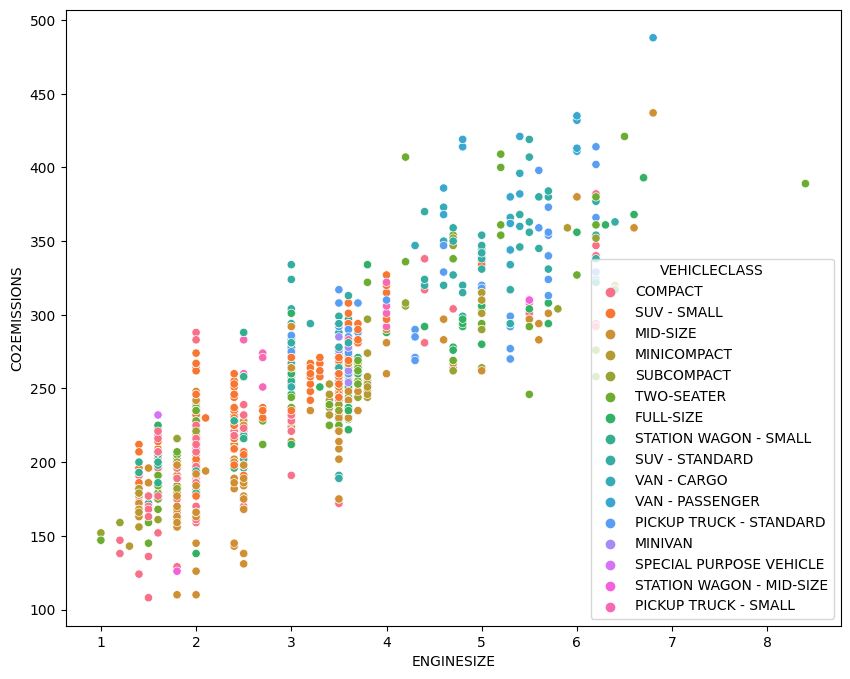

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, hue='VEHICLECLASS', x='ENGINESIZE', y='CO2EMISSIONS')

C:\Users\Dip-PC\AppData\Local\Temp\ipykernel_10884\1945975592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_make = df.groupby(by='MAKE').mean()[['CO2EMISSIONS']]


<BarContainer object of 39 artists>

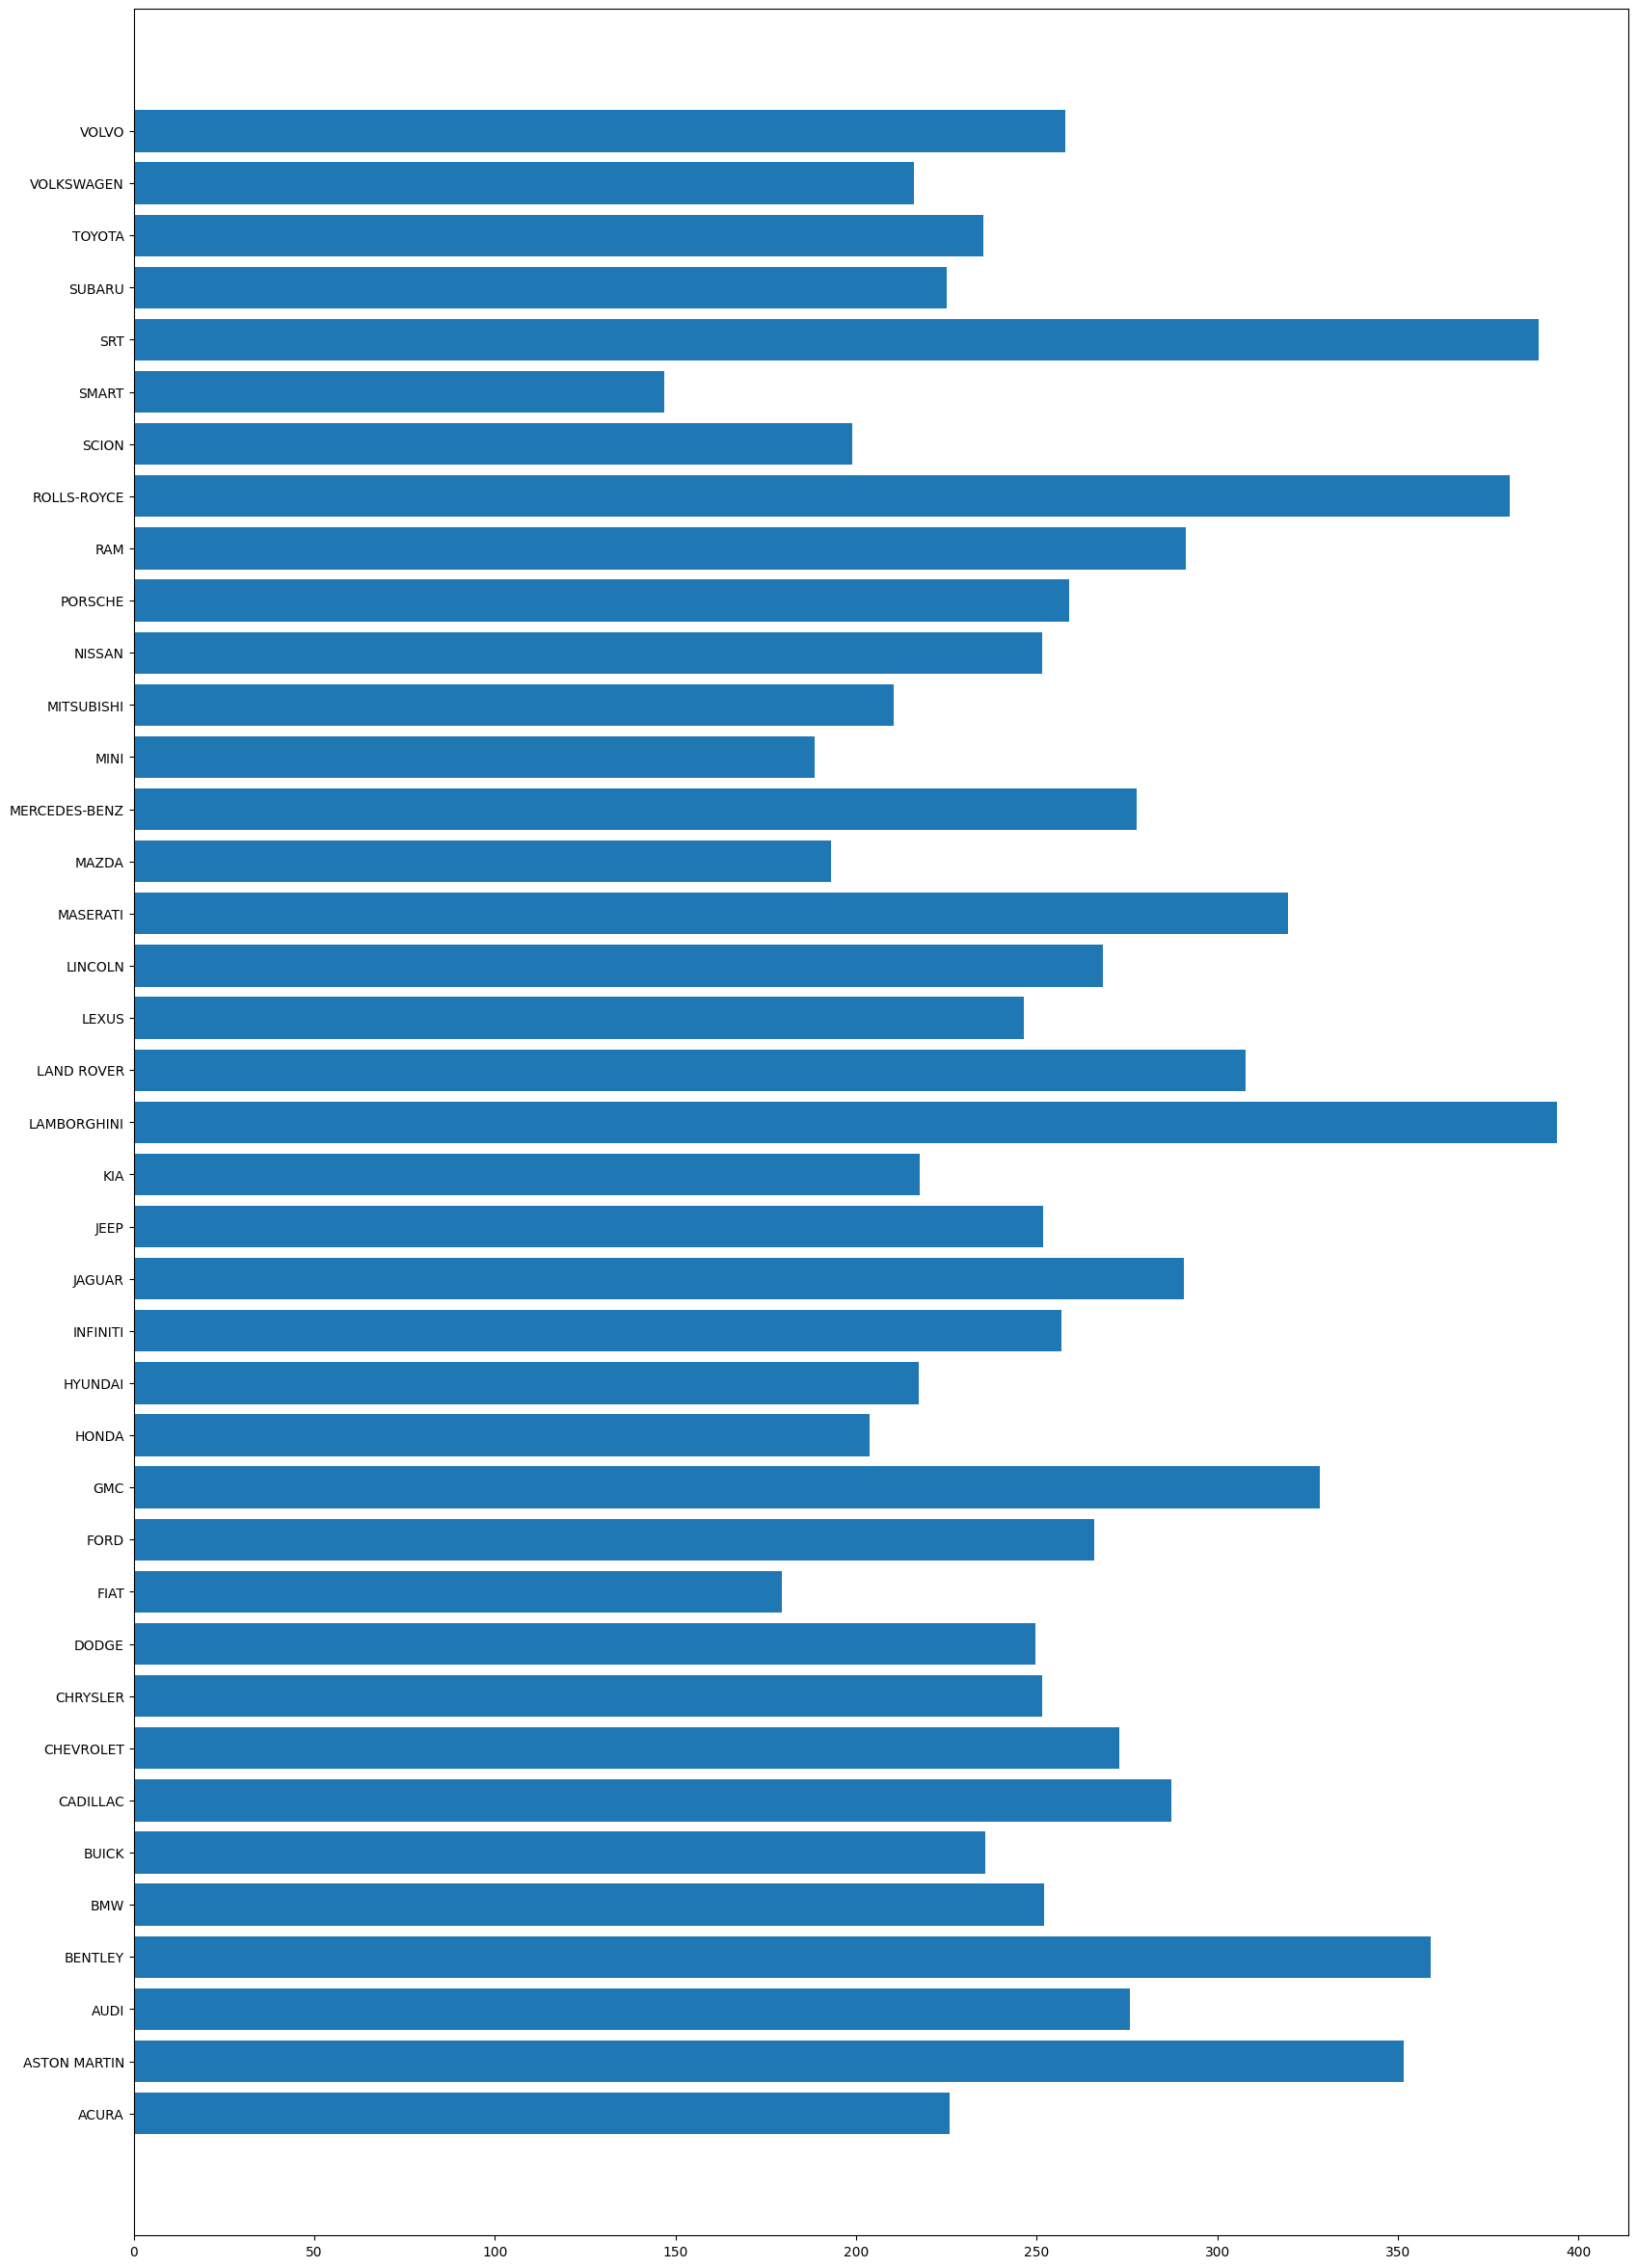

In [18]:
by_make = df.groupby(by='MAKE').mean()[['CO2EMISSIONS']]
plt.figure(figsize=(20, 30))
plt.barh(by_make.index, by_make.CO2EMISSIONS)

C:\Users\Dip-PC\AppData\Local\Temp\ipykernel_10884\106512015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_vehicleclass = df.groupby(by='VEHICLECLASS').mean()[['CO2EMISSIONS']]


<BarContainer object of 16 artists>

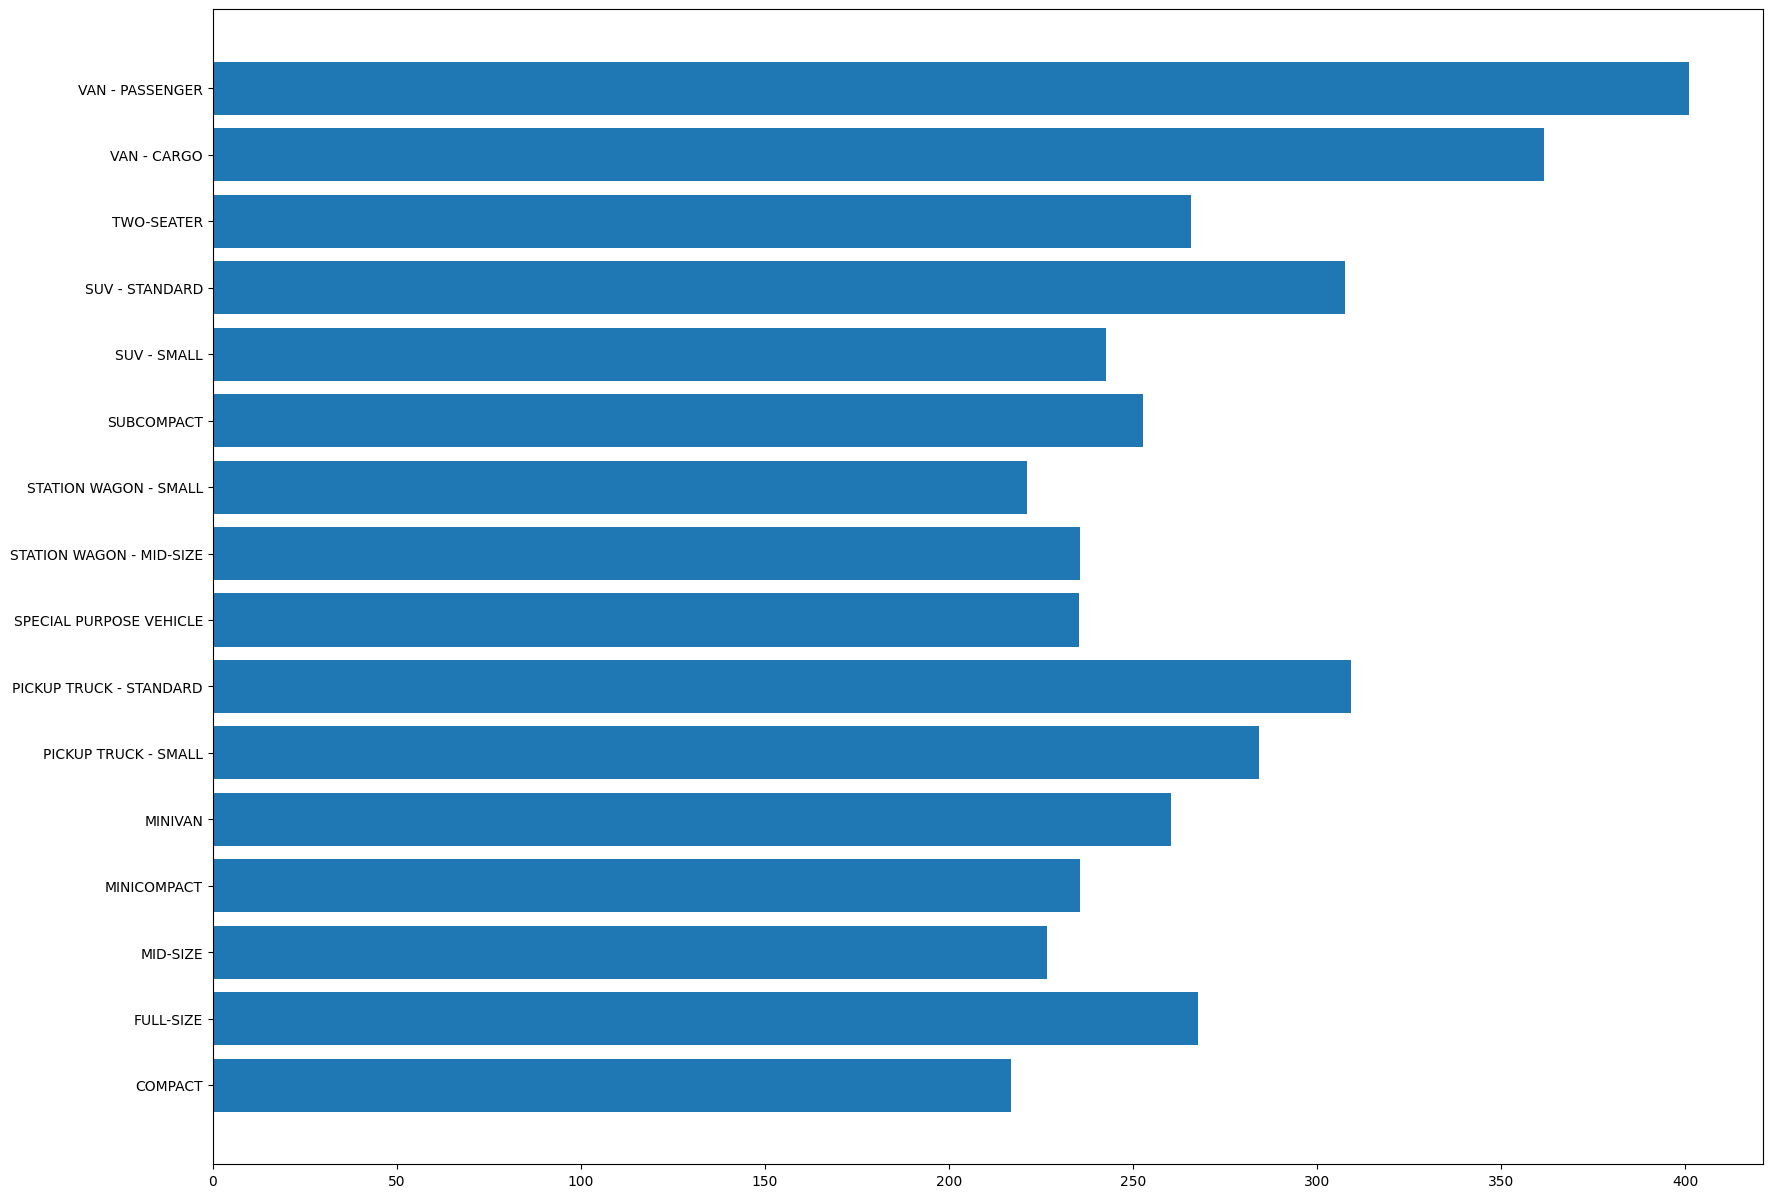

In [19]:
by_vehicleclass = df.groupby(by='VEHICLECLASS').mean()[['CO2EMISSIONS']]
plt.figure(figsize=(20, 15))
plt.barh(by_vehicleclass.index, by_vehicleclass.CO2EMISSIONS)

In [20]:
df.select_dtypes('object')

,MAKE,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,COMPACT,AS5,Z
1,ACURA,COMPACT,M6,Z
2,ACURA,COMPACT,AV7,Z
3,ACURA,SUV - SMALL,AS6,Z
4,ACURA,SUV - SMALL,AS6,Z
...,...,...,...,...
1062,VOLVO,SUV - SMALL,AS6,X
1063,VOLVO,SUV - SMALL,AS6,X
1064,VOLVO,SUV - SMALL,AS6,X
1065,VOLVO,SUV - SMALL,AS6,X


In [21]:
df1 = df.drop(columns=list(df.select_dtypes('object').columns))

In [22]:
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


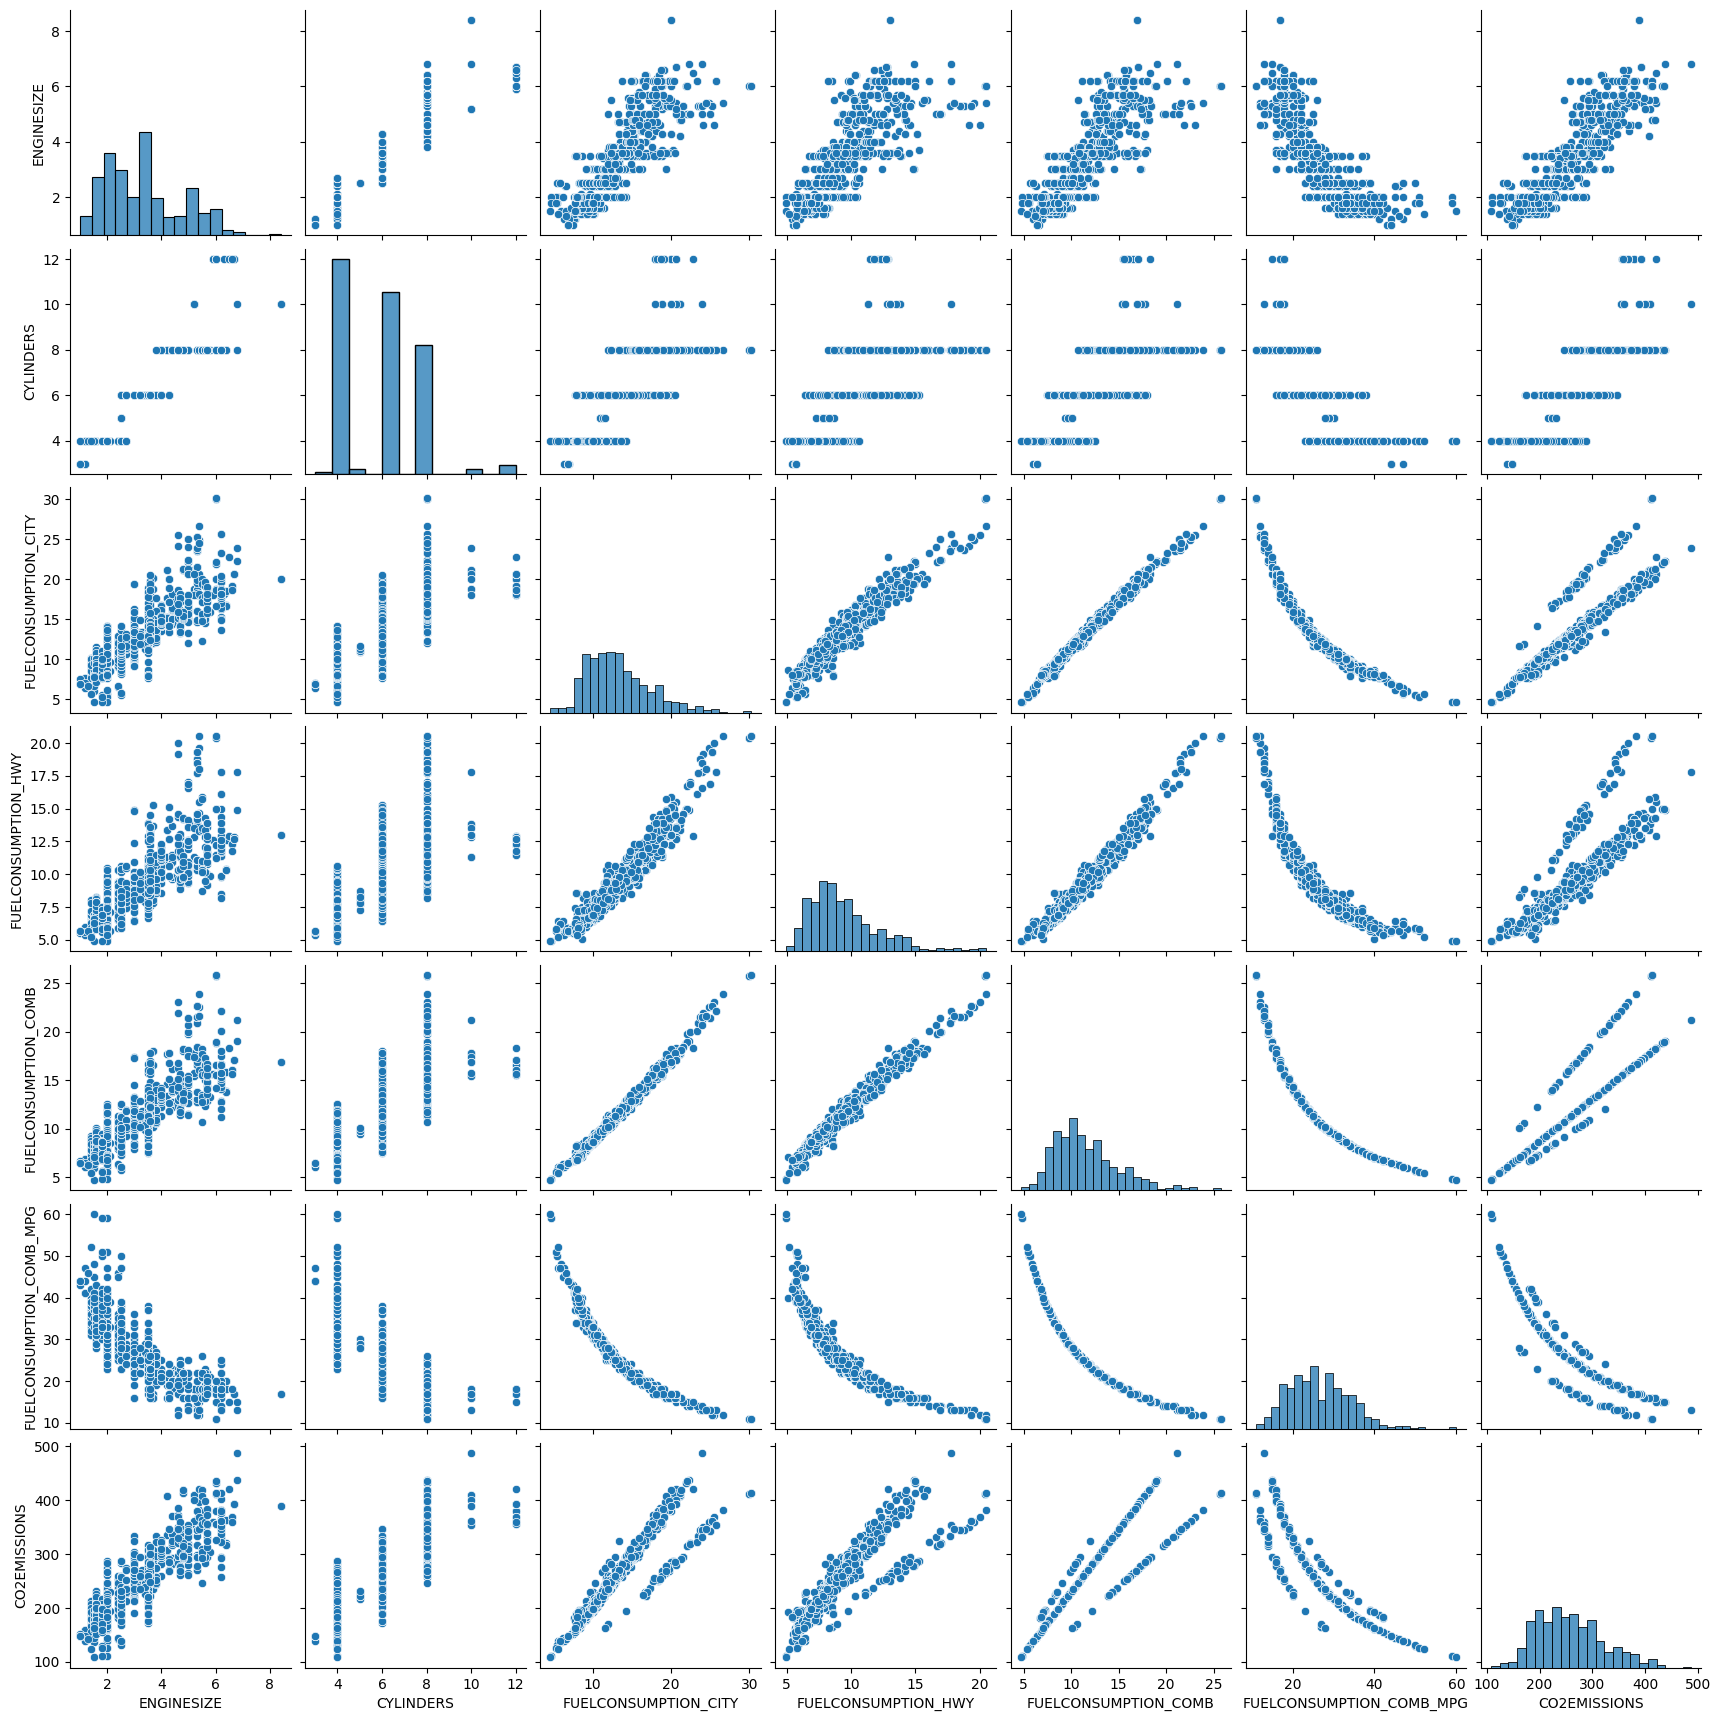

In [24]:
sns.pairplot(df1)

In [25]:
df.corr()[['CO2EMISSIONS']].sort_values(by='CO2EMISSIONS', ascending=False)

C:\Users\Dip-PC\AppData\Local\Temp\ipykernel_10884\4059099018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['CO2EMISSIONS']].sort_values(by='CO2EMISSIONS', ascending=False)


,CO2EMISSIONS
CO2EMISSIONS,1.000000
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685
FUELCONSUMPTION_COMB_MPG,-0.906394


## Outlier Detection and Removal

<AxesSubplot: >

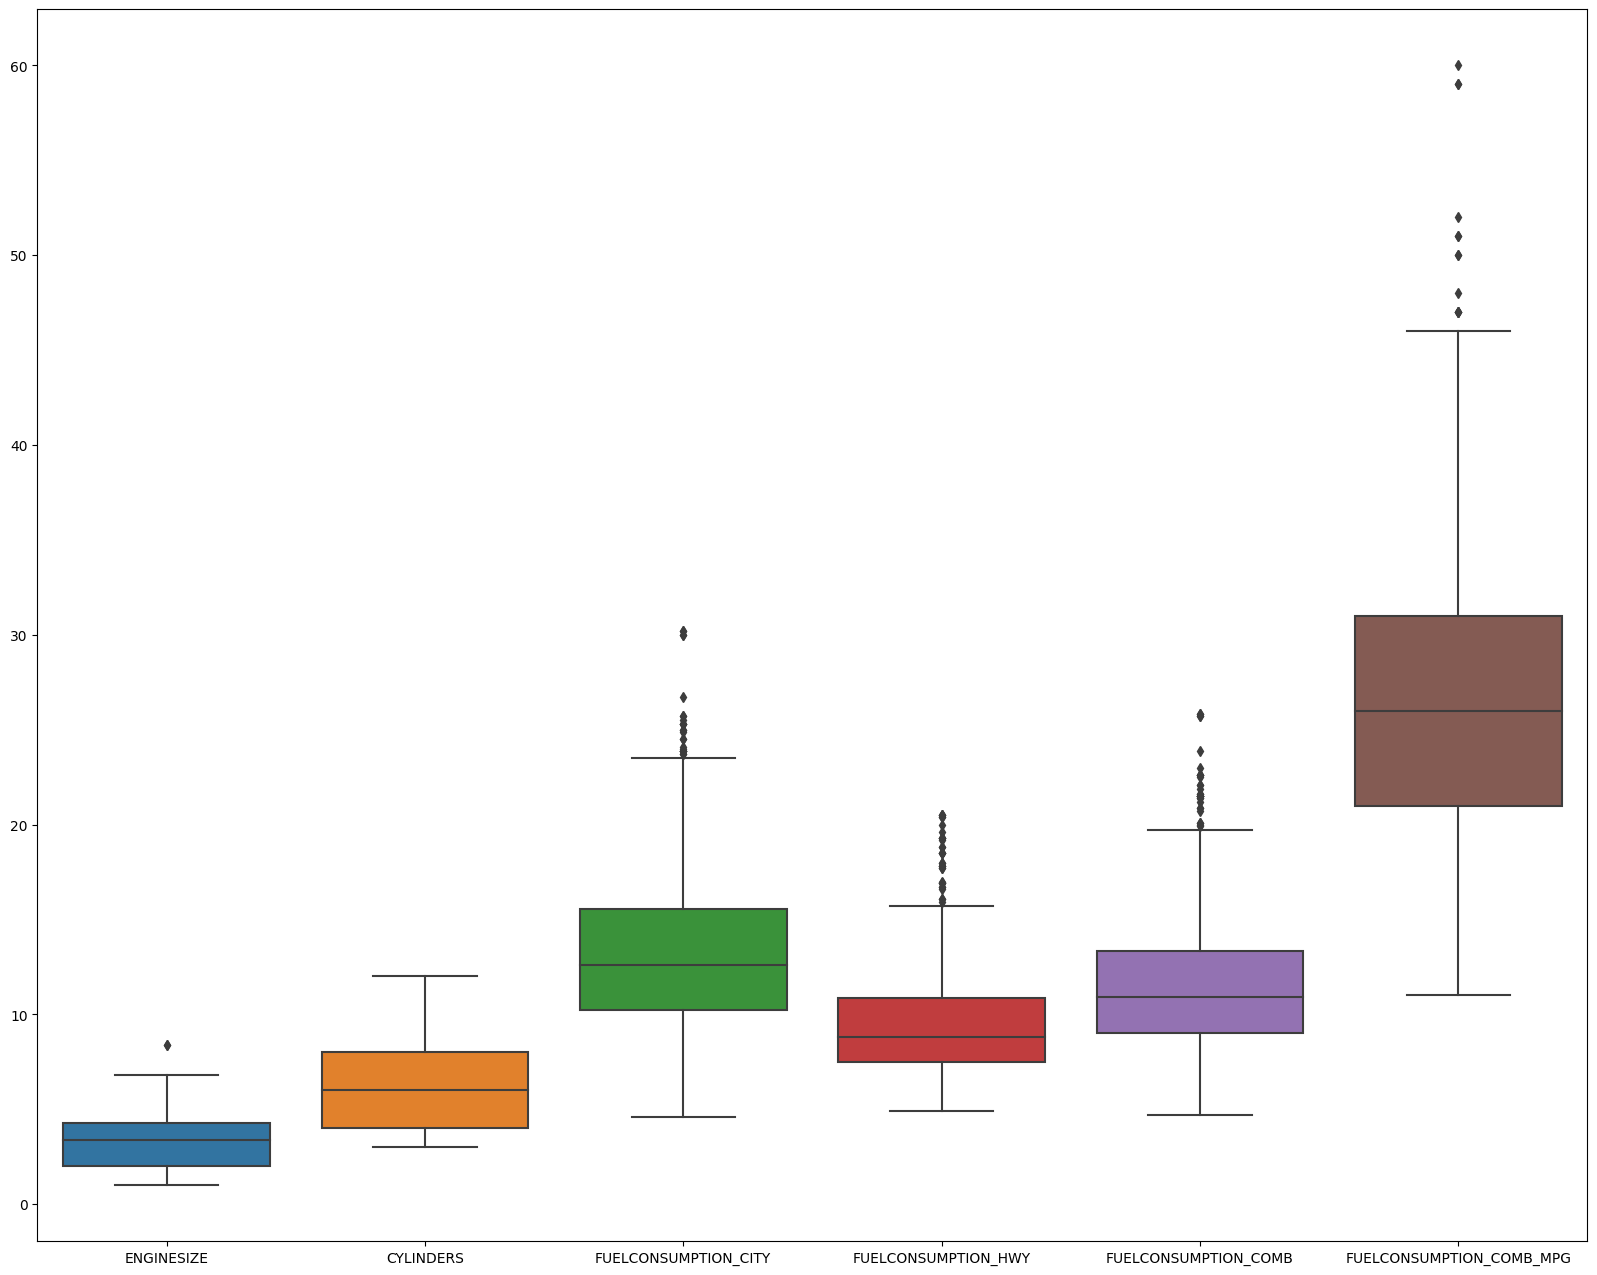

In [26]:
plt.figure(1, figsize=(20, 16))
sns.boxplot(data=df1.drop(columns=['CO2EMISSIONS']))

In [28]:
q1 = np.quantile(df1.FUELCONSUMPTION_CITY, .25)
q3 = np.quantile(df1.FUELCONSUMPTION_CITY, .75)

In [30]:
iqr = q3 - q1
iqr

5.300000000000001

In [36]:
xtreme_outliers = np.where(df1.FUELCONSUMPTION_CITY>(q3+(1.5*iqr)))[0]
lower_outliers = np.where(df1.FUELCONSUMPTION_CITY<(q1-(1.5*iqr)))[0]

In [37]:
lower_outliers

array([], dtype=int64)

In [42]:
class OutlierTreatment:
    def detect(self, df: pd.DataFrame, column_name: str):
        self.df = df
        q1 = np.quantile(df[column_name], .25)
        q3 = np.quantile(df[column_name], .75)
        iqr = q3 - q1
        self.xtreme_outliers = np.where(df[column_name]>(q3+(1.5*iqr)))[0]
        self.lower_outliers = np.where(df[column_name]<(q1-(1.5*iqr)))[0]
        return self.xtreme_outliers, self.lower_outliers

    def remove(self):
        self.df.drop(self.xtreme_outliers, inplace=True)
        self.df.drop(self.lower_outliers, inplace=True)
        return self.df

In [44]:
detector = OutlierTreatment()

In [45]:
detector.detect(df1, 'FUELCONSUMPTION_CITY')

(array([182, 214, 216, 218, 220, 222, 225, 228, 344, 346, 348, 349, 351,
        362, 438, 440, 442, 444, 446, 449, 452, 476, 642, 648, 654, 687],
       dtype=int64),
 array([], dtype=int64))

In [46]:
detector.remove()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [47]:
df1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


## Data Split

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(df1.drop(columns=['CO2EMISSIONS']), df1.CO2EMISSIONS, test_size=0.2, random_state=33)

In [52]:
xtrain

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
381,5.0,8,16.4,12.3,14.6,19
988,1.5,4,4.6,4.9,4.7,60
278,3.6,6,17.0,11.2,14.4,20
821,2.0,4,13.4,9.4,11.6,24
71,6.0,12,20.0,12.2,16.5,17
...,...,...,...,...,...,...
196,6.2,8,13.7,8.2,11.2,25
57,3.0,6,13.2,9.2,11.4,25
683,2.0,4,10.5,7.1,9.0,31
600,3.3,6,12.7,8.8,10.9,26


In [53]:
ytrain

381    336
988    108
278    230
821    267
71     380
      ... 
196    258
57     262
683    207
600    251
405    184
Name: CO2EMISSIONS, Length: 832, dtype: int64

## Feature Selection and Engineering

In [70]:
scores = mutual_info_regression(xtrain, ytrain)

In [73]:
scores = pd.DataFrame(scores, columns=['Scores'])
scores.index = xtrain.columns
scores.sort_values(by=['Scores'], ascending=False)

,Scores
FUELCONSUMPTION_COMB,4.172884
FUELCONSUMPTION_COMB_MPG,2.953457
FUELCONSUMPTION_CITY,2.244505
FUELCONSUMPTION_HWY,1.694397
ENGINESIZE,0.982274
CYLINDERS,0.715570


## Modeling - Linear Regression

In [80]:
model = LinearRegression()
# Training
model.fit(xtrain[['FUELCONSUMPTION_COMB']], ytrain)

LinearRegression()

In [77]:
model.coef_     # w : Weight

array([18.17527685])

In [79]:
model.intercept_        # b: bias

47.51252062453955

In [82]:
# Prediction
model.predict(xtest[['FUELCONSUMPTION_COMB']])

array([347.40458867, 231.08281682, 240.17045525, 274.70348127,
       203.81990155, 225.63023377, 289.24370275, 256.52820442,
       232.90034451, 227.44776145, 241.98798293, 349.22211636,
       240.17045525, 221.9951784 , 178.37451395, 172.9219309 ,
       252.89314904, 271.0684259 , 381.93761469, 254.71067673,
       211.09001229, 252.89314904, 278.33853664, 232.90034451,
       211.09001229, 309.23650728, 354.67469941, 321.95920108,
       212.90753997, 176.55698627, 251.07562136, 285.60864738,
       298.33134117, 381.93761469, 180.19204164, 292.87875812,
       260.16325979, 229.26528914, 260.16325979, 252.89314904,
       296.51381349, 296.51381349, 225.63023377, 292.87875812,
       361.94481015, 278.33853664, 298.33134117, 198.36731849,
       374.66750395, 291.06123043, 207.45495692, 192.91473544,
       289.24370275, 211.09001229, 203.81990155, 252.89314904,
       232.90034451, 252.89314904, 238.35292756, 278.33853664,
       196.54979081, 200.18484618, 221.9951784 , 202.00

In [83]:
ytest

147     264
1057    232
877     244
34      288
945     198
       ... 
682     281
764     278
369     292
777     380
838     380
Name: CO2EMISSIONS, Length: 209, dtype: int64